In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


#Reading in  the dataset
df=pd.read_excel('Telco_customer_churn.xlsx')
print(df.shape)

(7043, 33)


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [4]:
print(df.describe())

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.00

In [5]:
df=df.drop('CustomerID',axis=1)

In [6]:
print(df.dtypes)

Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [7]:
print(df['Total Charges'].values)

[108.15 151.65 820.5 ... 7362.9 346.45 6844.5]


In [8]:
df['Total Charges']=pd.to_numeric(df['Total Charges'],errors='coerce')
df[pd.to_numeric(df['Total Charges'],errors='coerce').isnull()]

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [9]:
df1 = df[(df['Total Charges'] != '') & (pd.notna(df['Total Charges']))]
df1.isnull().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

In [10]:
no_churn_customers=df1[df1['Churn Label']=='No']['Tenure Months']
yes_churn_customers=df1[df1['Churn Label']=='Yes']['Tenure Months']

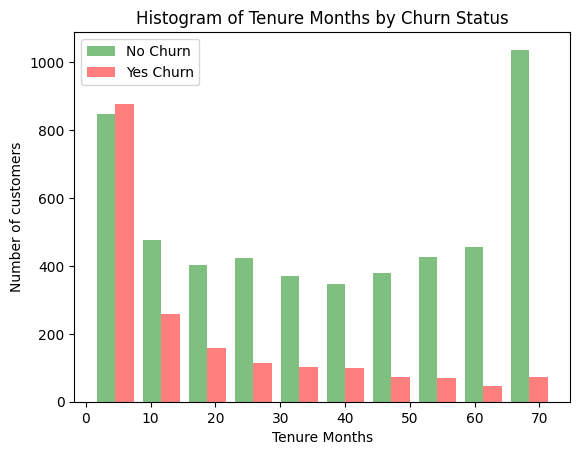

In [11]:
plt.hist([no_churn_customers,yes_churn_customers],color=['green','red'],label=['No Churn', 'Yes Churn'],bins=10,alpha=0.5)
plt.xlabel('Tenure Months')
plt.ylabel('Number of customers')
plt.title('Histogram of Tenure Months by Churn Status')
plt.legend()
plt.show()

In [12]:
no_churn_customers=df1[df1['Churn Label']=='No']['Monthly Charges']
yes_churn_customers=df[df['Churn Label']=='Yes']['Monthly Charges']

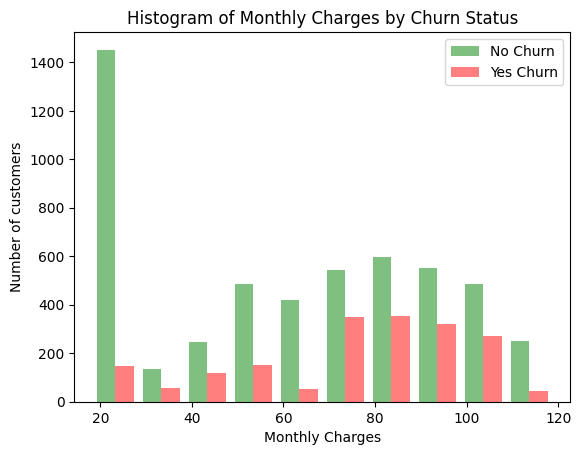

In [13]:
plt.hist([no_churn_customers,yes_churn_customers],color=['green','red'],label=['No Churn', 'Yes Churn'],bins=10,alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Histogram of Monthly Charges by Churn Status')
plt.legend()
plt.show()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

Country: ['United States']
State: ['California']
City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Lat Long: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' 'No phone service']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (auto

In [16]:
df1=df1.replace(['No internet service','No phone service'],'No')

In [17]:
print_unique_col_values(df1)

Country: ['United States']
State: ['California']
City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Lat Long: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No']
Online Backup: ['Yes' 'No']
Device Protection: ['No' 'Yes']
Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['No' 'Yes']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label: ['Yes' 'No']
Churn Reason: ['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'C

In [18]:
def is_yes_no(column):
    return set(column.unique()).issubset({'No','Yes'})
yes_no_columns=[col for col in df1.columns if is_yes_no(df1[col])]
print(yes_no_columns)

for col in yes_no_columns:
    df1[col]=df1[col].replace({'No':0,'Yes':1})
    df1[col] = df1[col].infer_objects(copy=False) 
for col in df1:
    print(f'{col}:{df1[col].unique()}')

['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label']
Count:[1]
Country:['United States']
State:['California']
City:['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Zip Code:[90003 90005 90006 ... 96134 96146 95569]
Lat Long:['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Latitude:[33.964131 34.059281 34.048013 ... 41.813521 39.191797 40.363446]
Longitude:[-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
 -123.835041]
Gender:['Male' 'Female']
Senior Citizen:[0 1]
Partner:[0 1]
Dependents:[0 1]
Tenure Months:[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 5

In [19]:
df1['Gender']=df1['Gender'].replace({'Female':1,'Male':0})
df1['Gender'] = df1['Gender'].infer_objects(copy=False)
print(df1['Gender'].unique())

[0 1]


In [20]:
df2=pd.get_dummies(data=df1,columns=['Internet Service','Contract','Payment Method'])
print(df2.columns)

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason', 'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')


In [21]:
df2.sample(4)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
4389,1,United States,California,Torrance,90504,"33.867257, -118.330794",33.867257,-118.330794,1,0,...,True,False,False,False,False,True,False,False,False,True
5903,1,United States,California,Murrieta,92563,"33.581045, -117.14719",33.581045,-117.147190,1,0,...,False,True,False,True,False,False,False,False,True,False
6699,1,United States,California,Chilcoot,96105,"39.872961, -120.198876",39.872961,-120.198876,1,0,...,True,False,False,False,True,False,False,False,False,True
2346,1,United States,California,Santa Barbara,93103,"34.438581, -119.685368",34.438581,-119.685368,1,0,...,True,False,False,True,False,False,True,False,False,False


In [22]:
print(df2.dtypes)

Count                                         int64
Country                                      object
State                                        object
City                                         object
Zip Code                                      int64
Lat Long                                     object
Latitude                                    float64
Longitude                                   float64
Gender                                        int64
Senior Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure Months                                 int64
Phone Service                                 int64
Multiple Lines                                int64
Online Security                               int64
Online Backup                                 int64
Device Protection                             int64
Tech Support                                  int64
Streaming TV

In [23]:
bool_columns = ['Internet Service_DSL','Internet Service_Fiber optic','Internet Service_No','Contract_Month-to-month','Contract_One year','Contract_Two year','Payment Method_Bank transfer (automatic)','Payment Method_Credit card (automatic)','Payment Method_Electronic check','Payment Method_Mailed check' ]

for col in bool_columns:
    df2[col] = df2[col].astype(int)

In [24]:
print(df2.dtypes)

Count                                         int64
Country                                      object
State                                        object
City                                         object
Zip Code                                      int64
Lat Long                                     object
Latitude                                    float64
Longitude                                   float64
Gender                                        int64
Senior Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure Months                                 int64
Phone Service                                 int64
Multiple Lines                                int64
Online Security                               int64
Online Backup                                 int64
Device Protection                             int64
Tech Support                                  int64
Streaming TV

In [25]:
columns_to_convert = [
    'Internet Service_DSL',
    'Internet Service_Fiber optic',
    'Internet Service_No',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'Payment Method_Bank transfer (automatic)',
    'Payment Method_Credit card (automatic)',
    'Payment Method_Electronic check',
    'Payment Method_Mailed check'
]

df2[columns_to_convert] = df2[columns_to_convert].astype('uint8')
print(df2.dtypes)

Count                                         int64
Country                                      object
State                                        object
City                                         object
Zip Code                                      int64
Lat Long                                     object
Latitude                                    float64
Longitude                                   float64
Gender                                        int64
Senior Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure Months                                 int64
Phone Service                                 int64
Multiple Lines                                int64
Online Security                               int64
Online Backup                                 int64
Device Protection                             int64
Tech Support                                  int64
Streaming TV

In [26]:
'''col_to_scale=['Tenure Months','Monthly Charges','Total Charges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])'''

"col_to_scale=['Tenure Months','Monthly Charges','Total Charges']\nfrom sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\ndf2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])"

In [27]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

Count:[1]
Country:['United States']
State:['California']
City:['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Zip Code:[90003 90005 90006 ... 96134 96146 95569]
Lat Long:['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Latitude:[33.964131 34.059281 34.048013 ... 41.813521 39.191797 40.363446]
Longitude:[-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
 -123.835041]
Gender:[0 1]
Senior Citizen:[0 1]
Partner:[0 1]
Dependents:[0 1]
Tenure Months:[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
Phone Service:[1 0]
Multiple Lines:[0 1]
Online Security:[1 0]
Online Backup:[1 0]
Device Protection:[0 1]
Tech Support:[0 1]
Streaming TV:[0 1]
Streaming Movies:[0

In [28]:
columns_to_drop=['Count','Country','State','Zip Code','City','Lat Long','Churn Reason']
df3=df2.drop(columns=columns_to_drop)
print(df3.columns)

Index(['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')


In [29]:
for col in df3:
    print(f'{col}:{df3[col].values}')

Latitude:[33.964131 34.059281 34.048013 ... 34.559882 34.1678   34.424926]
Longitude:[-118.272783 -118.30742  -118.293953 ... -115.637164 -116.86433
 -117.184503]
Gender:[0 1 1 ... 1 1 0]
Senior Citizen:[0 0 0 ... 0 0 0]
Partner:[0 0 0 ... 1 1 0]
Dependents:[0 1 1 ... 1 1 0]
Tenure Months:[ 2  2  8 ... 72 11 66]
Phone Service:[1 1 1 ... 1 0 1]
Multiple Lines:[0 0 1 ... 1 0 0]
Online Security:[1 0 0 ... 0 1 1]
Online Backup:[1 0 0 ... 1 0 0]
Device Protection:[0 0 1 ... 1 0 1]
Tech Support:[0 0 0 ... 0 0 1]
Streaming TV:[0 0 1 ... 1 0 1]
Streaming Movies:[0 0 1 ... 1 0 1]
Paperless Billing:[1 1 1 ... 1 1 1]
Monthly Charges:[ 53.85  70.7   99.65 ... 103.2   29.6  105.65]
Total Charges:[ 108.15  151.65  820.5  ... 7362.9   346.45 6844.5 ]
Churn Label:[1 1 1 ... 0 0 0]
Churn Value:[1 1 1 ... 0 0 0]
Churn Score:[86 67 86 ... 71 59 38]
CLTV:[3239 2701 5372 ... 5560 2793 5097]
Internet Service_DSL:[1 0 0 ... 0 1 0]
Internet Service_Fiber optic:[0 1 1 ... 1 0 1]
Internet Service_No:[0 0 0 ... 

In [30]:
print(df3.shape)

(7032, 32)


In [31]:
X=df3.drop('Churn Label',axis=1)
y=df3['Churn Label']

In [32]:
y.value_counts()

Churn Label
0    5163
1    1869
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
y_train.value_counts()

Churn Label
0    4114
1    1511
Name: count, dtype: int64

In [35]:
'''from imblearn.over_sampling import SMOTE#Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state=5,sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_resampled.value_counts())'''

'from imblearn.over_sampling import SMOTE#Synthetic Minority Over-sampling Technique\nsmote = SMOTE(random_state=5,sampling_strategy=0.5)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\n# Check the new class distribution\nprint("Original training set shape:", y_train.value_counts())\nprint("Resampled training set shape:", y_train_resampled.value_counts())'

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
import numpy as np
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.regularizers import l2
#from sklearn.utils.class_weight import compute_class_weight

In [38]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

# Build the model
def build_model(input_shape):
        model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
        ])
        return model
        
input_shape=(X_train.shape[1],)
model=build_model(input_shape)


Class Weights: {0: np.float64(0.6836412250850753), 1: np.float64(1.8613500992720053)}


In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history=model.fit(X_train,y_train,
                  epochs=50,
                  batch_size=32,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=early_stopping,
                  #class_weight=class_weight_dict,
                  verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5922 - loss: 1.7469 - val_accuracy: 0.7271 - val_loss: 1.6102
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6260 - loss: 1.6635 - val_accuracy: 0.7484 - val_loss: 1.5423
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6678 - loss: 1.5713 - val_accuracy: 0.7484 - val_loss: 1.4772
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7083 - loss: 1.5029 - val_accuracy: 0.7556 - val_loss: 1.4163
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7165 - loss: 1.4287 - val_accuracy: 0.7653 - val_loss: 1.3535
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7318 - loss: 1.3673 - val_accuracy: 0.7760 - val_loss: 1.2884
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7383 - loss: 1.3220 - val_accuracy: 0.7911 - val_loss: 1.2247
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7587 - loss: 1.2645 - val_accuracy: 0.

In [41]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0947


[0.094632588326931, 1.0]

In [42]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Generate classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5)  # Get binary predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0947
Test Loss: 0.094632588326931
Test Accuracy: 1.0
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00       358

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407

[[1049    0]
 [   0  358]]


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


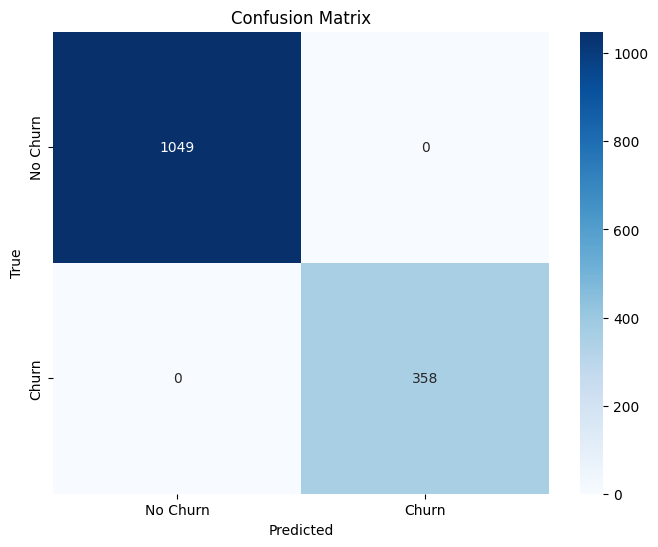

In [43]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


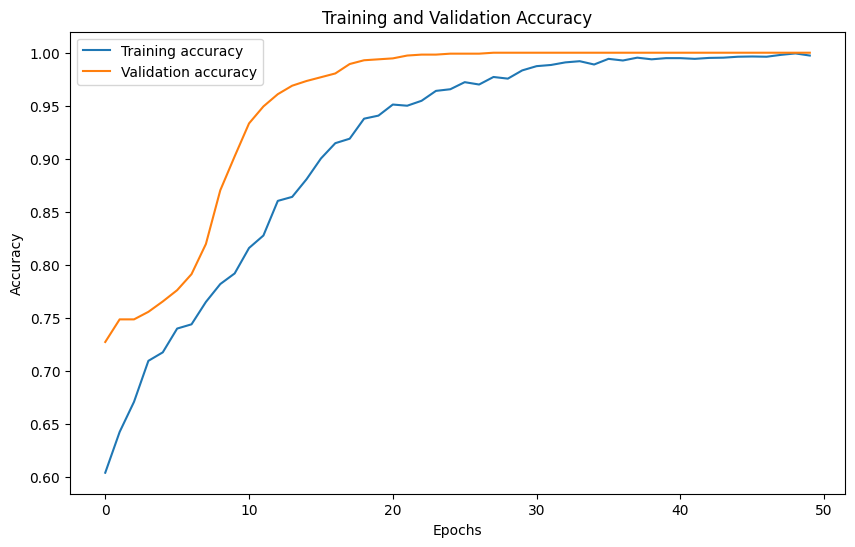

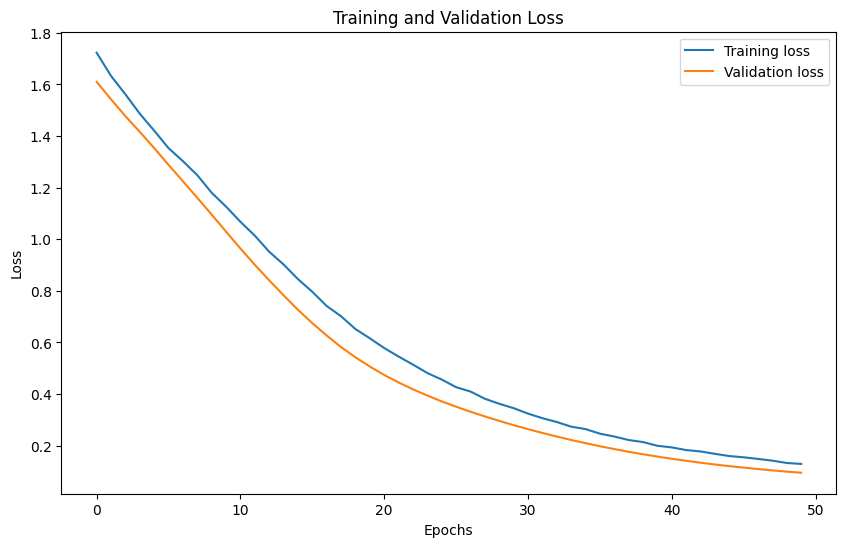

In [45]:
# Plotting training history
def plot_history(history, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history[metric], label=f'Training {metric}')
    plt.plot(history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f'Training and Validation {metric.capitalize()}')  
    plt.legend()
    plt.show()

# Plot the accuracy and loss curves
plot_history(history.history, 'accuracy')
plot_history(history.history, 'loss')

In [46]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss:{loss:.4f}')
print(f'Test Accuracy:{accuracy:.4f}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0947
Test Loss:0.0946
Test Accuracy:1.0000


PermutationExplainer explainer: 1408it [03:21,  6.74it/s]                                                              


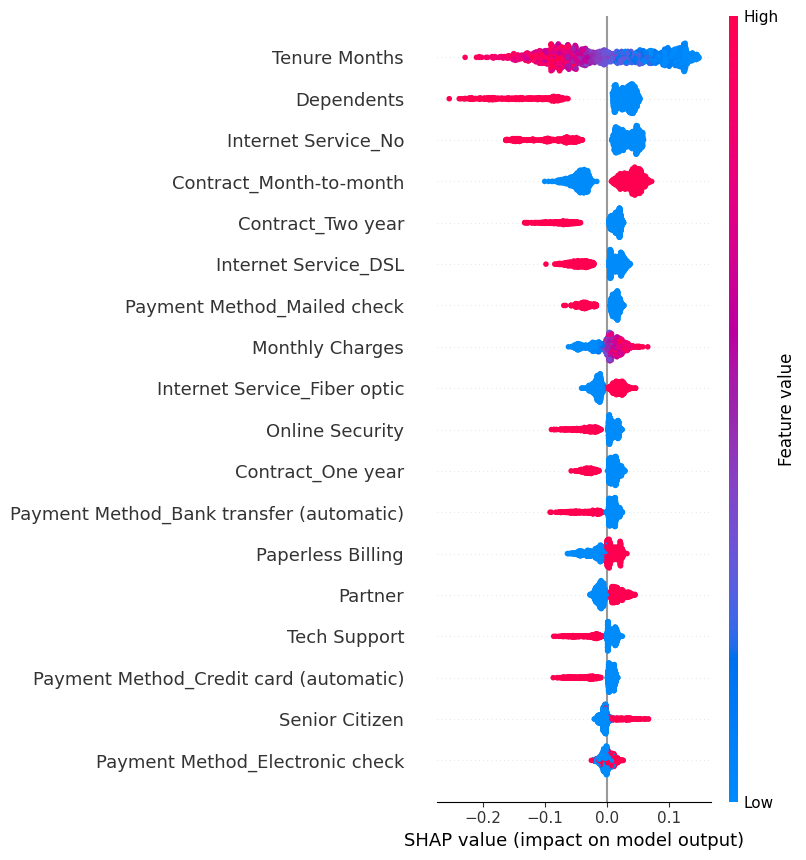

In [73]:
import shap

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
explainer = shap.Explainer(model, X_test_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled)

In [48]:
'''Top Influential Features (from most to less):
Senior Citizen

Payment Method_Electronic check

Internet Service_Fiber optic

Contract_Month-to-month

Online Security

Partner

Tech Support

Monthly Charges

Paperless Billing

Dependents

Tenure Months'''


'Top Influential Features (from most to less):\nSenior Citizen\n\nPayment Method_Electronic check\n\nInternet Service_Fiber optic\n\nContract_Month-to-month\n\nOnline Security\n\nPartner\n\nTech Support\n\nMonthly Charges\n\nPaperless Billing\n\nDependents\n\nTenure Months'

In [49]:
selected_features=['Senior Citizen',
                   'Payment Method_Bank transfer (automatic)',
                   'Payment Method_Credit card (automatic)',
                   'Payment Method_Electronic check',
                   'Payment Method_Mailed check',
                   'Internet Service_DSL',
                   'Internet Service_Fiber optic',
                   'Internet Service_No',
                   'Contract_Month-to-month',
                   'Contract_One year',
                   'Contract_Two year',
                   'Online Security',
                   'Partner',
                   'Tech Support',
                   'Monthly Charges',
                   'Paperless Billing',
                   'Dependents',
                   'Tenure Months']

In [50]:
X=df3[selected_features]
y=df3['Churn Value']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in Streamlit
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Optional: Check class distribution after SMOTE
from collections import Counter
print("After SMOTE:", Counter(y_train_resampled))

After SMOTE: Counter({0: 4130, 1: 4130})


In [54]:
'''class_weights = compute_class_weight(
    class_weight={0:1, 1:4},
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

#Save class weights
with open('class_weights.pkl', 'wb') as f:
    pickle.dump(class_weight_dict, f)'''

"class_weights = compute_class_weight(\n    class_weight={0:1, 1:4},\n    classes=np.unique(y_train),\n    y=y_train\n)\nclass_weight_dict = dict(enumerate(class_weights))\n\n#Save class weights\nwith open('class_weights.pkl', 'wb') as f:\n    pickle.dump(class_weight_dict, f)"

In [66]:
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model

input_shape = (X_train_scaled.shape[1],)
model = build_model(input_shape)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping],
    #class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7048 - loss: 0.7016 - val_accuracy: 0.7396 - val_loss: 0.6256
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7442 - loss: 0.6098 - val_accuracy: 0.7724 - val_loss: 0.5534
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7642 - loss: 0.5621 - val_accuracy: 0.7867 - val_loss: 0.5174
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7774 - loss: 0.5353 - val_accuracy: 0.7947 - val_loss: 0.5011
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7904 - loss: 0.5291 - val_accuracy: 0.8044 - val_loss: 0.4925
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5149 - val_accuracy: 0.8089 - val_loss: 0.4871
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.5134 - val_accuracy: 0.8098 - val_loss: 0.4826
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7885 - loss: 0.5129 - val_accuracy: 0.

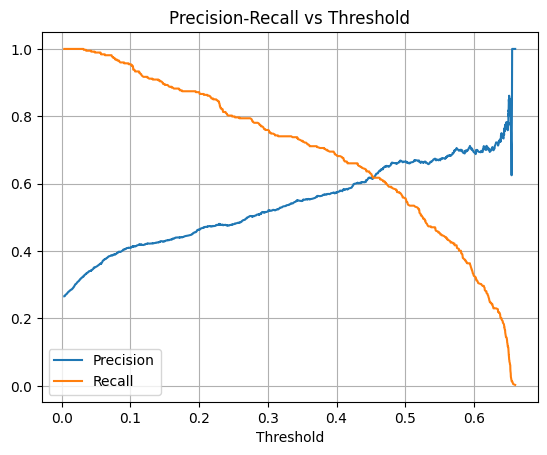

In [68]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot to choose the best threshold visually
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid(True)
plt.title('Precision-Recall vs Threshold')
plt.show()


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, (y_pred > 0.44).astype(int)))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1033
           1       0.61      0.65      0.63       374

    accuracy                           0.79      1407
   macro avg       0.74      0.75      0.74      1407
weighted avg       0.80      0.79      0.80      1407



In [71]:
model.save('customer_churn_model.keras')

In [72]:
import pickle
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)